# Polynomial Regression with a Seaborn Dataset

This notebook demonstrates how to perform Polynomial Regression using a dataset from the Seaborn library. We will use the 'tips' dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

## 1. Load the Dataset

In [2]:
df = sns.load_dataset('tips')

## 2. Exploratory Data Analysis (EDA)

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 3. Prepare Data for Modeling

In [6]:
X = df[['total_bill']]
y = df['tip']

## 4. Split Data into Training and Testing Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Create and Train the Polynomial Regression Model

In [8]:
# We will create a pipeline to add polynomial features to our linear model
# Let's try a 2nd-degree polynomial
degree = 2
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

polynomial_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

## 6. Make Predictions

In [9]:
y_pred = polynomial_regression.predict(X_test)

## 7. Evaluate the Model

In [10]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.6398918052296465
Mean Squared Error (MSE): 0.5874658712121732
R-squared: 0.5300165292317479


## 8. Visualize the Results

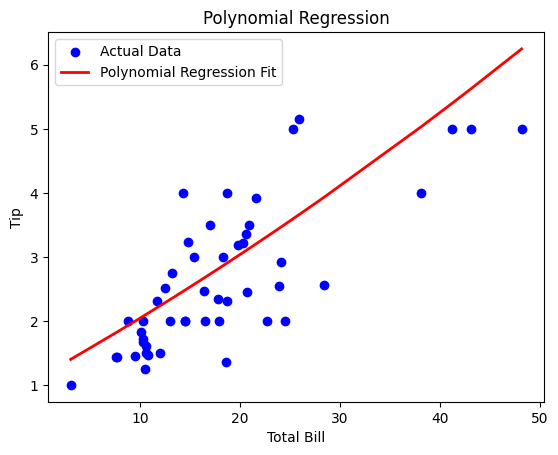

In [11]:
# Create a scatter plot of the test data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# To plot the regression line, we need to sort the X values
X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test[['total_bill']].values, y_pred)))

plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()